# K-Means Clustering

## Importing Libraries

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

## Importing Datasets

In [64]:
dataset = pd.read_csv("Mall_Customers.csv")

In [65]:
print(type(dataset))
dataset.head()

<class 'pandas.core.frame.DataFrame'>


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [66]:
X = dataset.iloc[:,-2:] # All columns except CustomerID is required, but only 2 columns included here
print("Type of X: {}".format(type(X)))
print("Number of rows in X:{}".format(len(X)))
print("X : \n{}".format(X.head()))

Type of X: <class 'pandas.core.frame.DataFrame'>
Number of rows in X:200
X : 
   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


## Visualizing Dataset

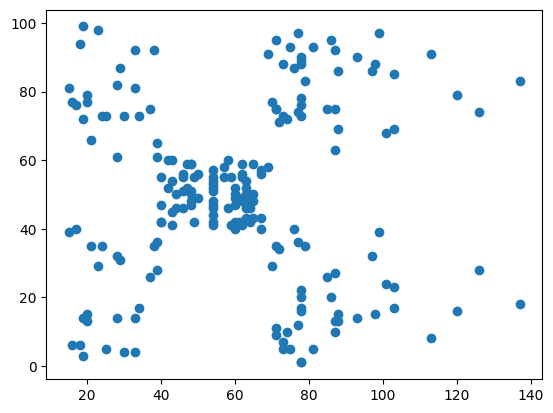

In [67]:
plt.scatter(dataset['Annual Income (k$)'], dataset['Spending Score (1-100)'])
plt.show()

## Using Elbow Method

In [68]:
from sklearn.cluster import KMeans

In [69]:
# Finding WCSS values
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
print("WCSS values: {}".format(wcss))

WCSS values: [269981.28, 181363.59595959596, 106348.37306211119, 73679.78903948834, 44448.45544793371, 37233.81451071001, 30259.65720728547, 25011.839349156595, 21862.09267218289, 19672.07284901432]


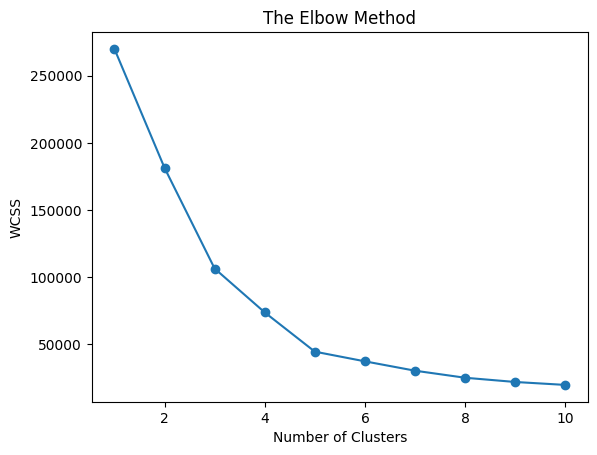

In [70]:
# Plotting WCSS for elbow method
plt.scatter(range(1,11), wcss, marker='o')
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Training K-Means Model On Dataset

In [71]:
kmeans = KMeans(n_clusters= 5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

## Visualing the Dataset

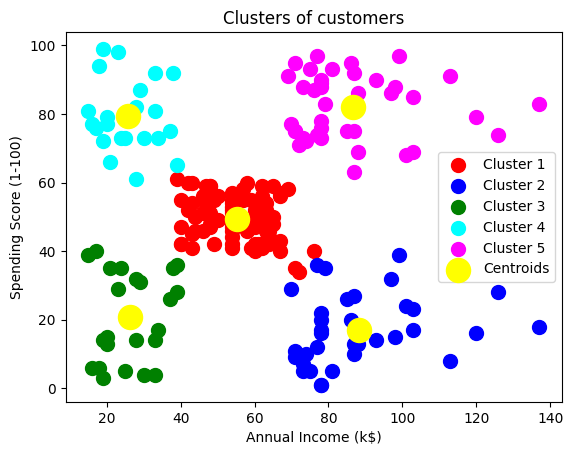

In [73]:
X = np.array(X)
plt.scatter(X[y_kmeans == 0, 0] , X[y_kmeans == 0, 1] , s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0] , X[y_kmeans == 1, 1] , s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0] , X[y_kmeans == 2, 1] , s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0] , X[y_kmeans == 3, 1] , s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0] , X[y_kmeans == 4, 1] , s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()